## Data Visualization with Python - Final Project

In this Assignment, the participants will demonstrate the data visualization skills they has learned by completing this course. They will be required to generate two visualization plots. The first one will be a plot to summarize the results of a survey that was conducted to gauge an audience interest in different data science topics. The second plot is a Choropleth map of the crime rate in San Francisco.

Please note that this assignment is worth 20% of the participant's final grade.

In [1]:
# IMPORTING LIBRARIES NEEDED TO COMPLETE THIS PROJECT:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
try:
    import folium
    print('Folium installed and imported!')
except:
    !conda install -c conda-forge folium=0.11.0 --yes
    import folium
    print('Folium installed and imported!')

Folium installed and imported!


## First Task

A survey was conducted to gauge an audience interest in different data science topics, namely:

Big Data (Spark / Hadoop)
Data Analysis / Statistics
Data Journalism
Data Visualization
Deep Learning
Machine Learning
The participants had three options for each topic: **Very Interested**, **Somewhat interested**, and **Not interested**. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through [this link](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Topic_Survey_Assignment.csv).

If the participants examine the csv file, they will find that the first column represents the data science topics and the first row represents the choices for each topic.

Using the pandas read_csv method to read the csv file into a pandas dataframe, that looks like the following:

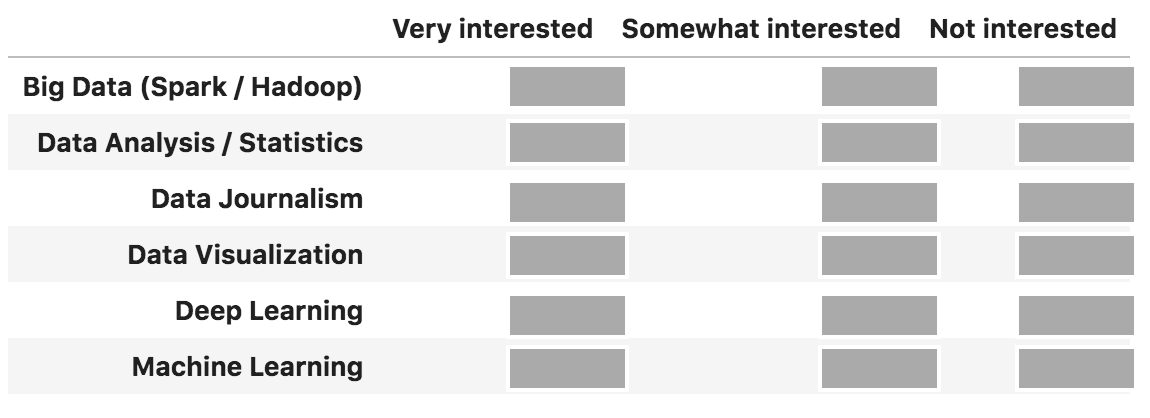

A survey was conducted to gauge an audience interest in different data science topics, namely:

1. Big Data (Spark / Hadoop)
2. Data Analysis / Statistics
3. Data Journalism
4. Data Visualization
5. Deep Learning
6. Machine Learning

The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: Topic_Survey_Assignment

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

Use the pandas read_csv method to read the csv file into a pandas dataframe, that looks like the following:


In order to read the data into a dataframe like the above, one way to do that is to use the index_col parameter in order to load the first column as the index of the dataframe. Here is the documentation on the pandas read_csv method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Once you have succeeded in creating the above dataframe, please upload a screenshot of your dataframe with the actual numbers. (**5 marks**)

In [2]:
# QUESTION 1. Insert your code below
df1 = pd.read_csv('Topic_Survey_Assignment.csv')
df1

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


## Second Task

Use the artist layer of Matplotlib to replicate the bar chart below to visualize the **percentage** of the respondents' interest in the different data science topics surveyed.

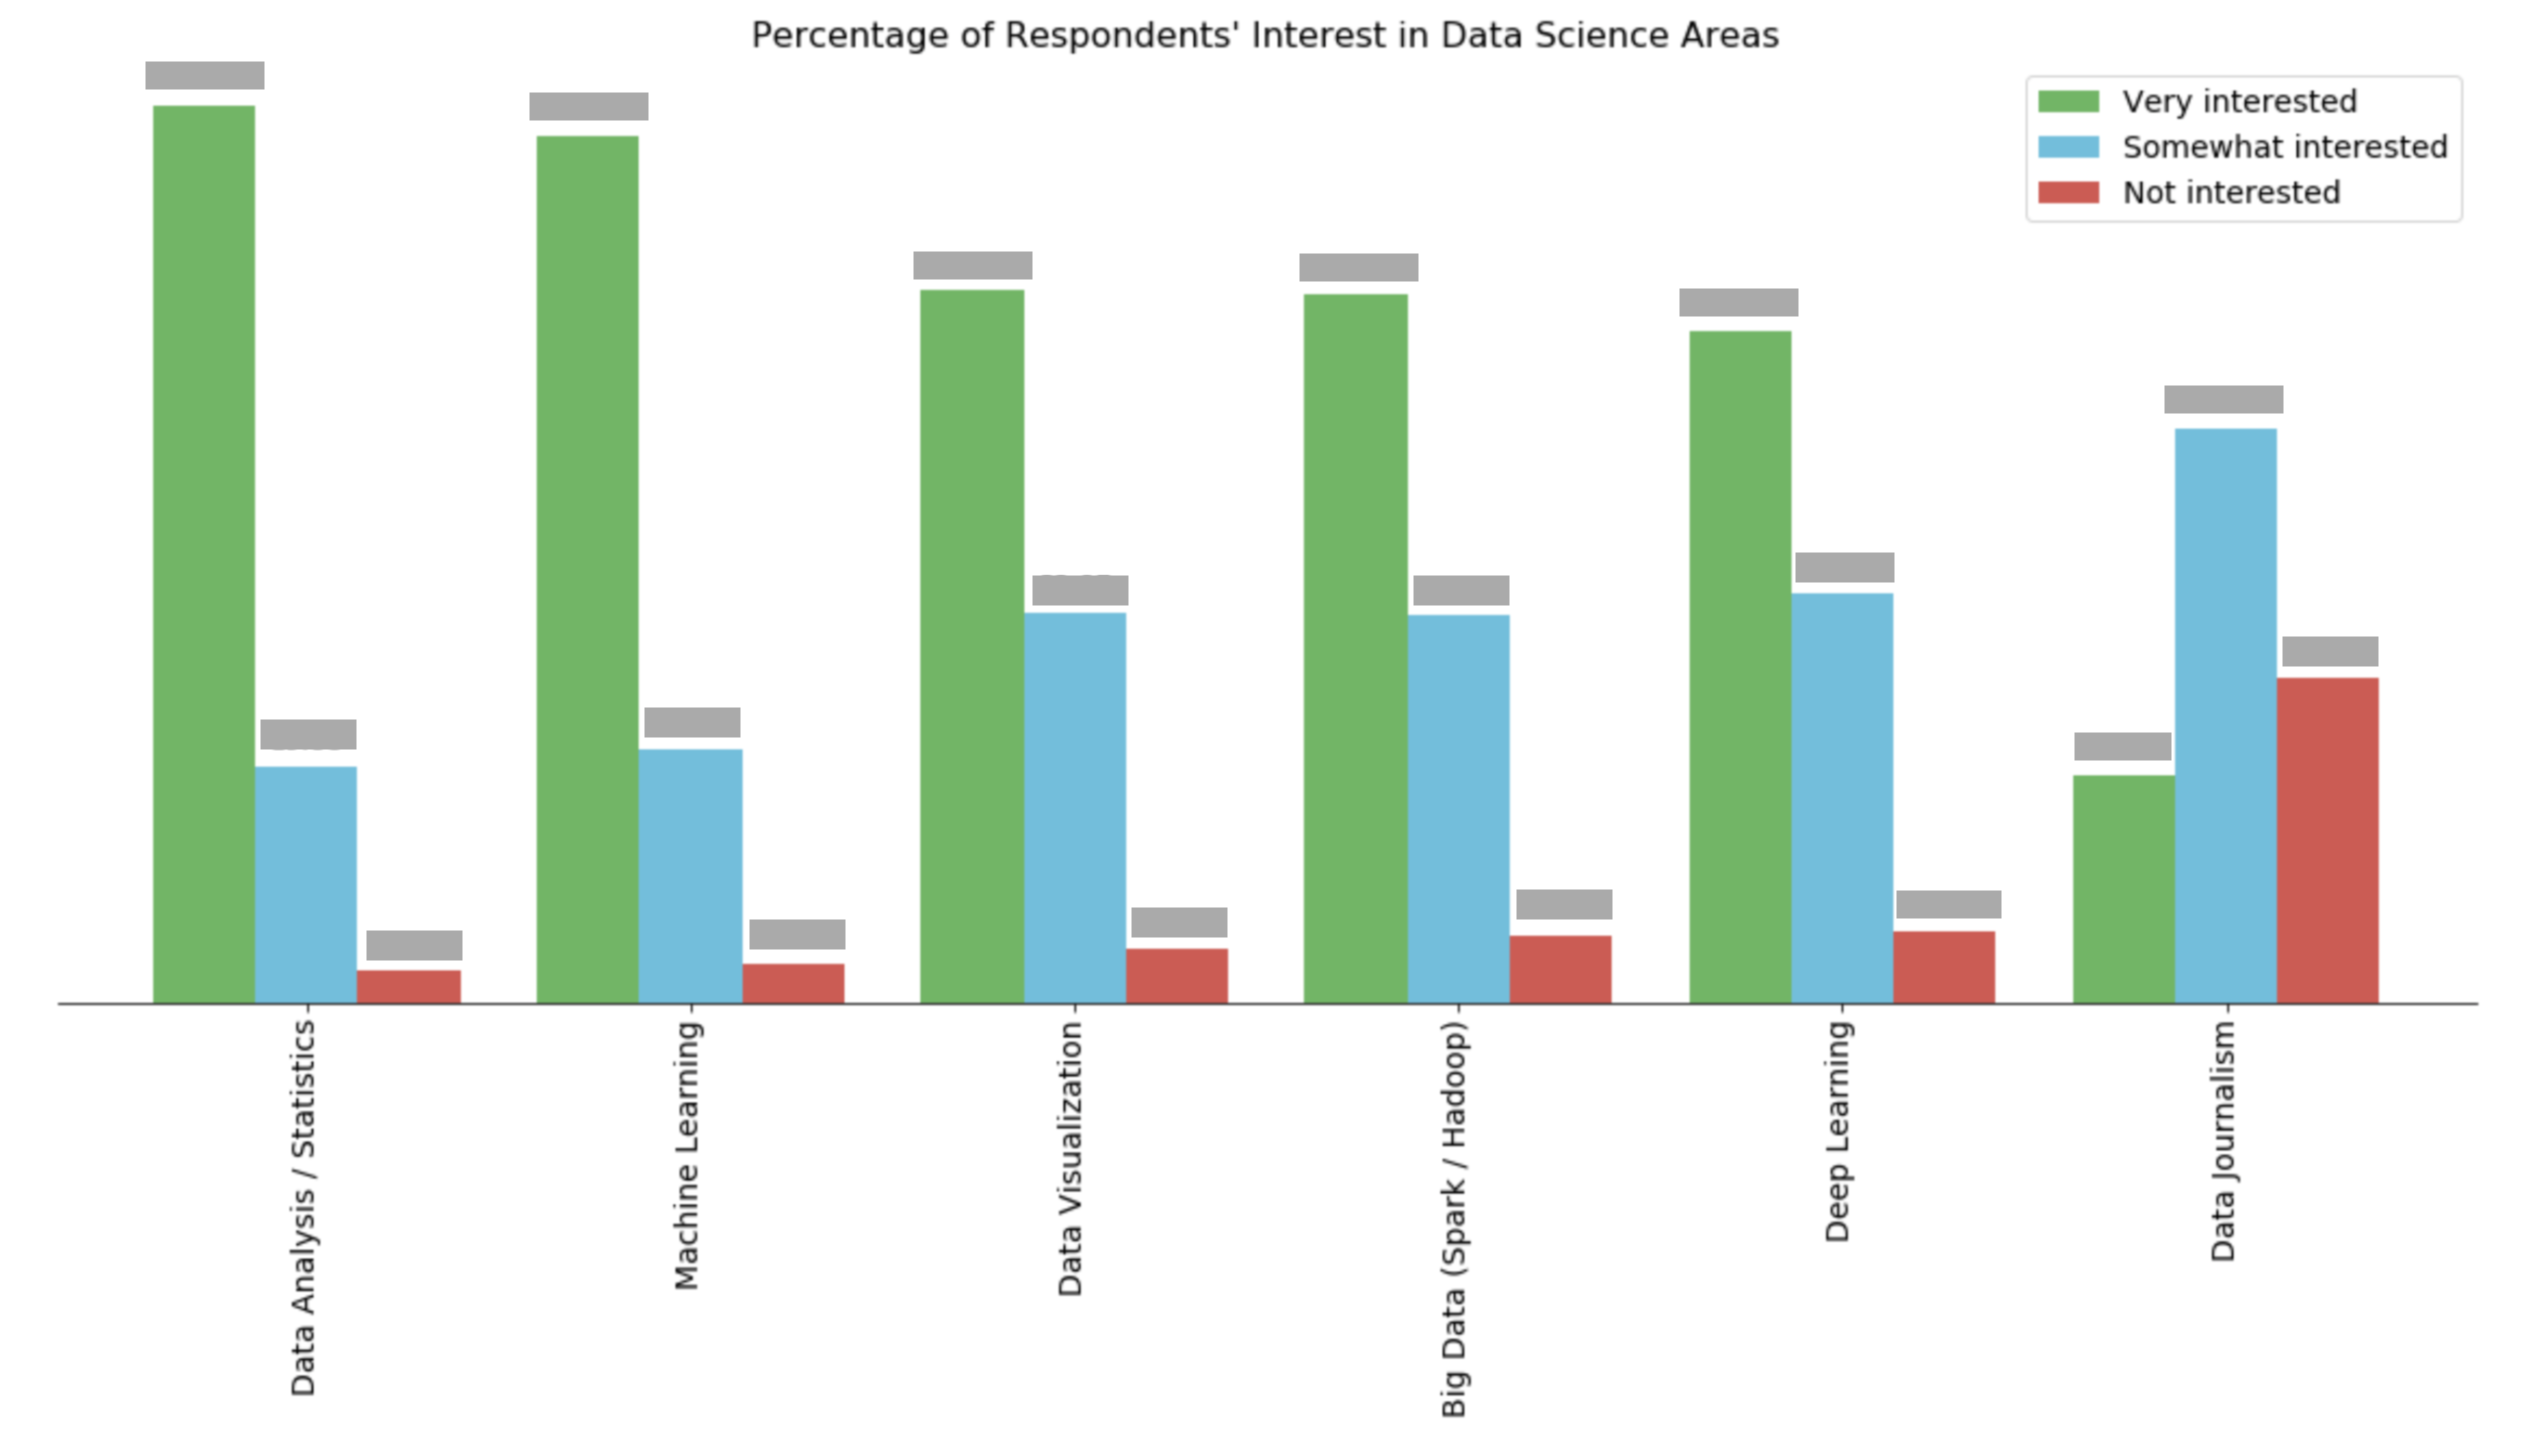

To create this bar chart, you can follow the following steps:

1. Sort the dataframe in descending order of Very interested.
2. Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.
3. As for the chart:

 - use a figure size of (20, 8),
 - bar width of 0.8,
 - use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
 - use font size 14 for the bar labels, percentages, and legend,
 - use font size 16 for the title, and,
 - display the percentages above the bars as shown above, and remove the left, top, and right borders.

Once you are satisfied with your chart, please upload a screenshot of your plot. (**5 marks**)

<Figure size 432x288 with 0 Axes>

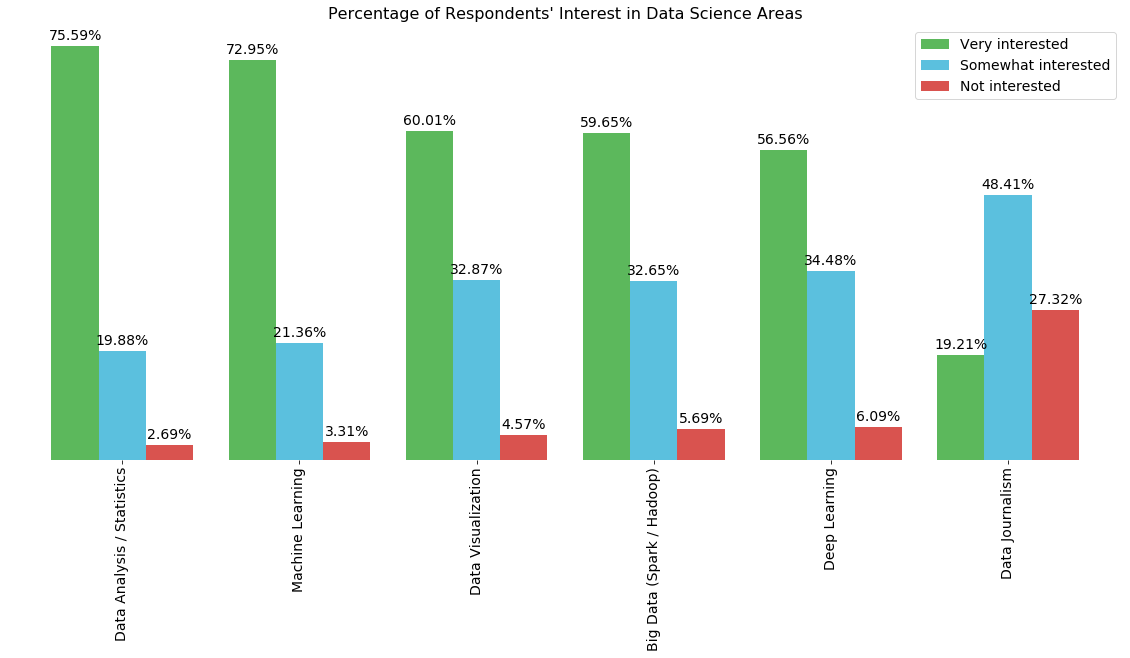

In [4]:
# QUESTION 2. Insert your code below

# Sort in descending order by 'Very interested'
df1.sort_values(by='Very interested',ascending=False,inplace=True)

# Converting into percentages, with 2 decimal places
respondent_amount = 2233
df1_rounded = (df1 / respondent_amount * 100).round(2)
categories, interest = df1_rounded.shape

# Graphing
plt.figure()
title_size, lxtp_size, barwidth = 16, 14, 0.8
spine_sides = ['top','bottom','left','right']

ax = df1_rounded.plot(kind='bar',
                figsize=(20,8),
                color = ('#5cb85c','#5bc0de','#d9534f'),
                width = barwidth)
ax.set_title('Percentage of Respondents\' Interest in Data Science Areas',
             fontdict={'fontsize':title_size}) # Setting title text and font size (16)
ax.legend(fontsize=lxtp_size)                  # Setting legend font size (14)
ax.tick_params(axis='x',labelsize=lxtp_size)   # Setting xticks font size (14)
ax.yaxis.set_visible(False)                    # Hiding yaxis labels
for side in spine_sides:                       # Hiding 'spines' in all sides
    ax.spines[side].set_visible(False)

rects = ax.patches # Provides (x,y) position, width, heigth & angle af ALL the bars

for rect in rects:                             # Adding labels on top of each bar
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',size = 14)

## Third Task

In the final lab, we created a map with markers to explore crime rate in San Francisco, California. In this question, you are required to create a Choropleth map to visualize crime in San Francisco.

Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes.

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

1. Central,
2. Southern,
3. Bayview,
4. Mission,
5. Park,
6. Richmond,
7. Ingleside,
8. Taraval,
9. Northern, and,
10. Tenderloin.

Convert the San Francisco dataset, which you can also [find here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Police_Department_Incidents_-_Previous_Year__2016_.zip), San Francisco dataset , into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.

Paste this link in the browser and download the zip file.

Extract the csv file from the zip file.

Later upload the csv file to skills lab and use it.

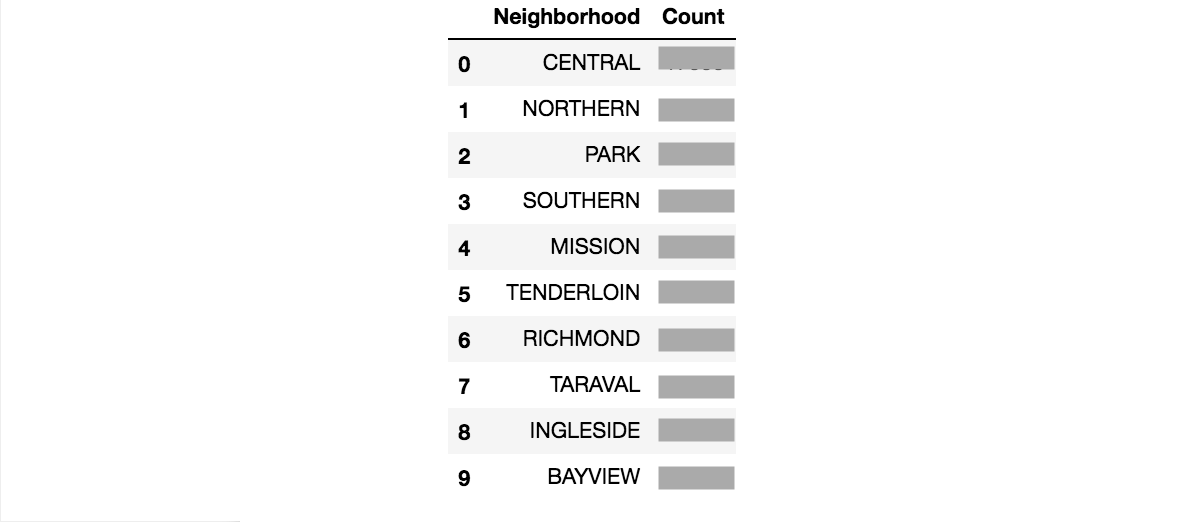

Once you are happy with your dataframe, upload a screenshot of your pandas dataframe. (**5 marks**)

In [5]:
# QUESTION 3. Insert your code below
df2 = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
df2_filtered = (df2['PdDistrict'].value_counts().to_frame().reset_index()).rename(columns={'index':'Neighborhood','PdDistrict':'Count'})
df2_filtered

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


## Fourth Task

Now you should be ready to proceed with creating the Choropleth map.

As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: GeoJSON

For the map, make sure that:

 - it is centred around San Francisco,
 - -you use a zoom level of 12,
 - you use fill_color = 'YlOrRd',
 - you define fill_opacity = 0.7,
 - you define line_opacity=0.2, and,
 - you define a legend and use the default threshold scale.

If you follow the lab on Choropleth maps and use the GeoJSON correctly, you should be able to generate the following map:

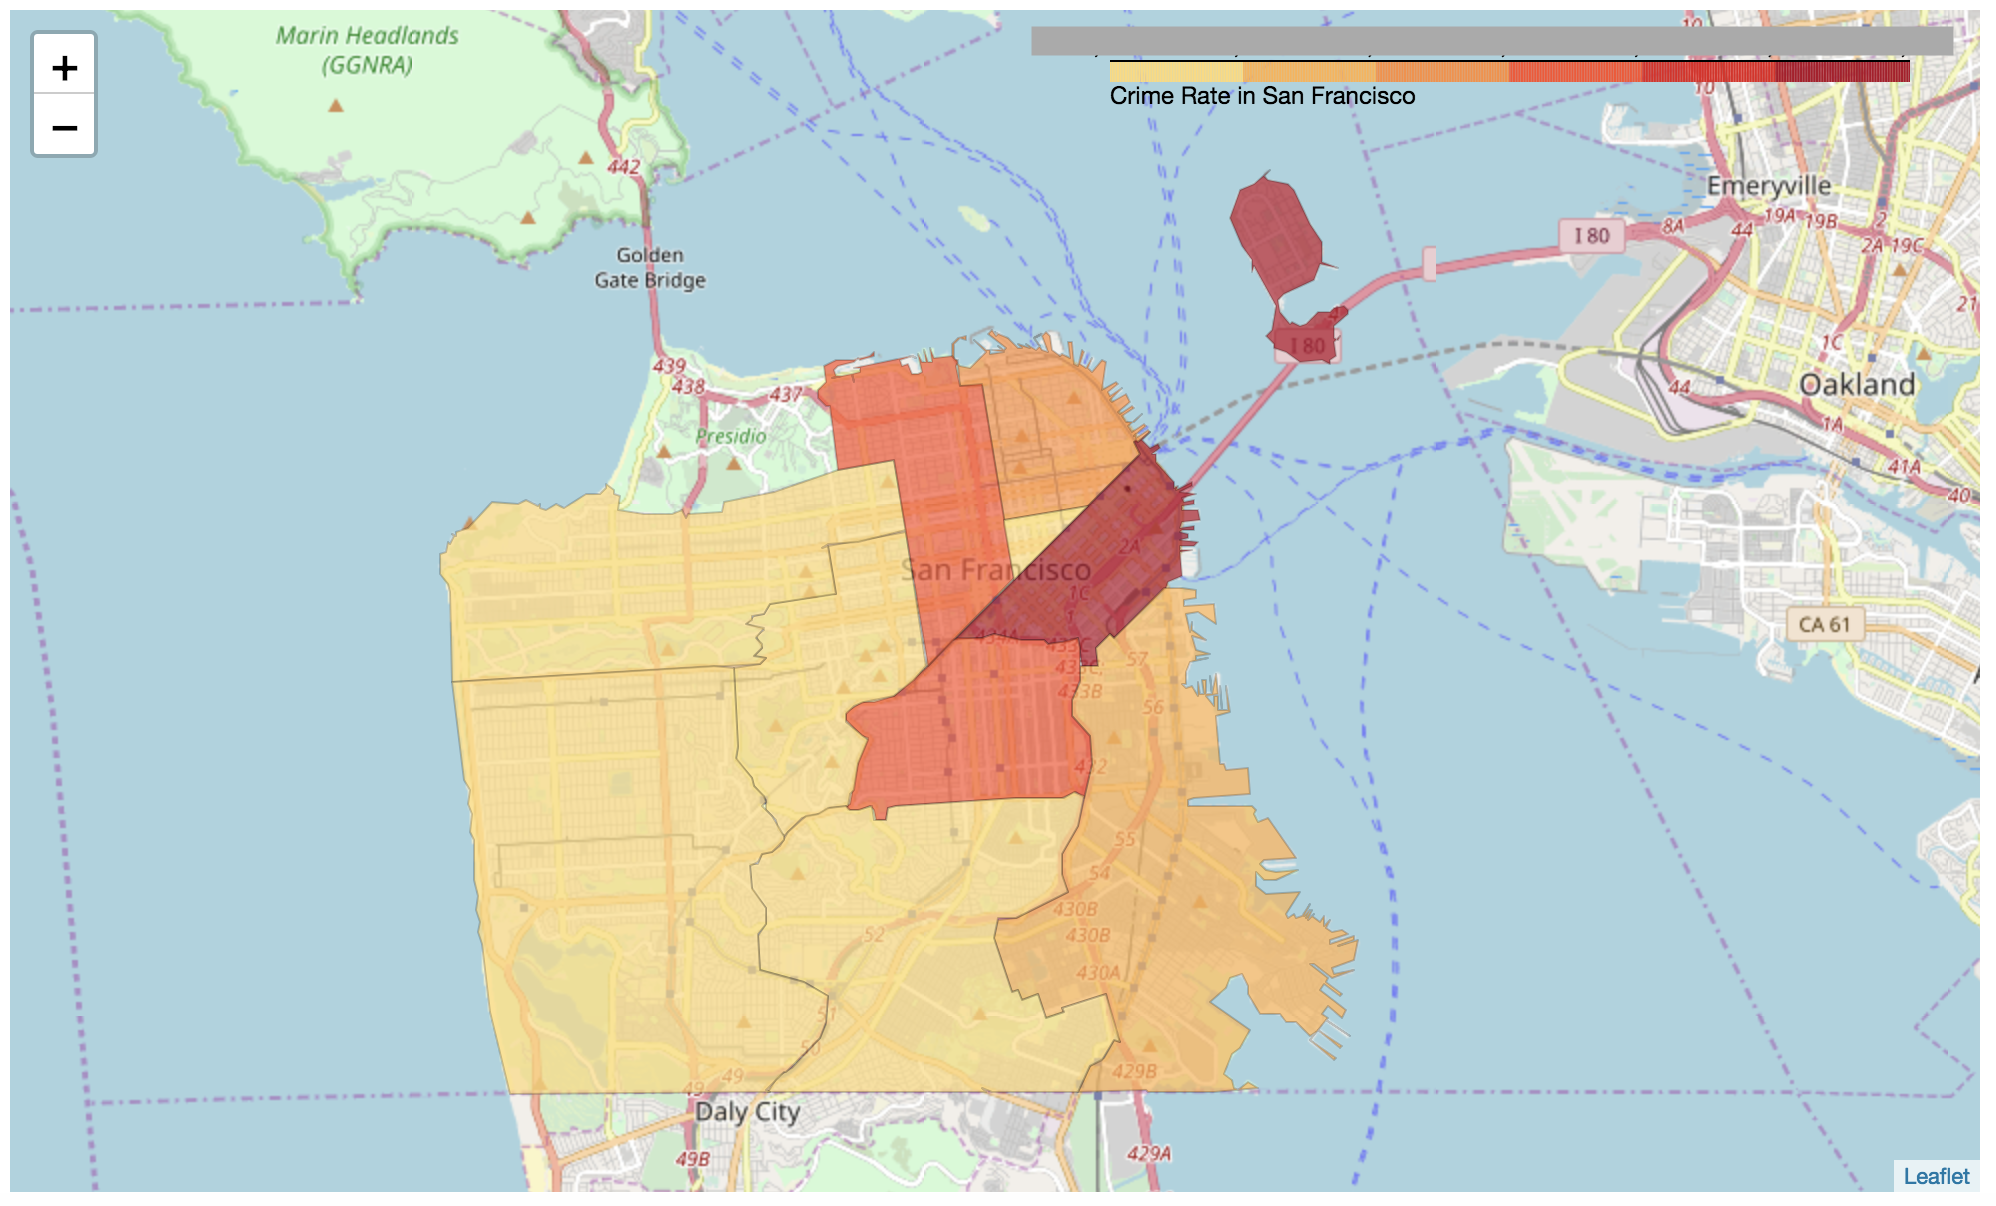

Once you are ready to submit your map, please upload a screenshot of your Choropleth map. (**5 marks**)

In [6]:
# QUESTION 4. Insert your code below

world_geo = r'san-francisco.geojson'

latitude = 37.77
longitude = -122.42

# let Folium determine the scale.
world_map = folium.Map(location=[latitude, longitude], zoom_start=12)
world_map.choropleth(
    geo_data=world_geo,
    data=df2_filtered,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco',
    reset=True
)
world_map

C:\Users\david\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
